**Assignment - 3**

**Create and Load Dataset**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import sys
from sklearn.preprocessing import StandardScaler

In [ ]:

data=pd.read_csv('/content/Data/Automobile_data.csv')


In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Data preprocessing**

**Discriptive statistics**

In [ ]:
data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,116,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.330927,3.258049,10.142537,104.331707,5125.121951,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270973,0.314152,3.972040,39.526576,476.985643,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [ ]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.330927,3.258049,10.142537,104.331707,5125.121951,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270973,0.314152,3.972040,39.526576,476.985643,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Data wrangling or Handle Missing Values**

In [ ]:
data.replace('?', np.nan, inplace = True)

**Get all missing values**

In [ ]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Na

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
data['normalized-losses']=data['normalized-losses'].astype(float)
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)
data['price']=data['price'].astype(float)

In [ ]:
data[data['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [ ]:
data[(data['body-style']=='sedan')  & ((data['make']=='dodge') | (data['make']=='mazda'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


In [ ]:
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
data[data.columns[1:]].corr()['horsepower'][:-1]

normalized-losses    0.295772
wheel-base           0.352297
length               0.555003
width                0.642482
height              -0.110711
curb-weight          0.751034
engine-size          0.810773
bore                 0.577273
stroke               0.090254
compression-ratio   -0.205874
horsepower           1.000000
peak-rpm             0.130971
city-mpg            -0.803620
highway-mpg         -0.770908
Name: horsepower, dtype: float64

In [ ]:
data["horsepower"].replace(np.nan, 112, inplace=True)

In [ ]:
data[data['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9895.0


In [ ]:
data.iloc[130:132, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
130,181.5,66.5,55.2,2579,ohc,four
131,176.8,66.6,50.5,2460,ohc,four


In [ ]:
data[data.columns[1:]].corr()['peak-rpm'][:-1]

normalized-losses    0.264597
wheel-base          -0.361052
length              -0.287325
width               -0.219957
height              -0.322272
curb-weight         -0.266306
engine-size         -0.244618
bore                -0.264269
stroke              -0.071493
compression-ratio   -0.436221
horsepower           0.130971
peak-rpm             1.000000
city-mpg            -0.113788
highway-mpg         -0.054257
Name: peak-rpm, dtype: float64

In [ ]:
nan_peak_rpm = data[(data['peak-rpm'] >= 4800) & (data['peak-rpm'] <= 5500) & (data['fuel-system'] == 'mpfi') & (data['engine-location'] == 'front') & (data['drive-wheels'] == 'rwd') & (data['aspiration'] == 'std') & (data['fuel-type'] == 'gas') & (data['engine-type'] == 'ohc') & (data['num-of-cylinders'] == 'four')]

In [ ]:
nan_peak_rpm['peak-rpm'].mean()

5100.0

In [ ]:
data["peak-rpm"].replace(np.nan, 5100, inplace=True)

In [ ]:
data[data['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [ ]:
data.iloc[55:59, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
55,169.0,65.7,49.6,2380,rotor,two
56,169.0,65.7,49.6,2380,rotor,two
57,169.0,65.7,49.6,2385,rotor,two
58,169.0,65.7,49.6,2500,rotor,two


In [ ]:
data[data.columns[1:]].corr()['bore'][:-1]

normalized-losses   -0.036167
wheel-base           0.490378
length               0.607480
width                0.559204
height               0.176195
curb-weight          0.649045
engine-size          0.594090
bore                 1.000000
stroke              -0.055909
compression-ratio    0.005203
horsepower           0.577439
peak-rpm            -0.264045
city-mpg            -0.594584
highway-mpg         -0.594572
Name: bore, dtype: float64

In [ ]:
data["bore"].replace(np.nan, 3.39, inplace=True)

In [ ]:
data[data['stroke'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.39,NaN,9.4,135.0,6000.0,16,23,15645.0


**correlation with other numerical attributes** 

In [ ]:
data[data.columns[1:]].corr()['stroke'][:-1]

normalized-losses    0.065627
wheel-base           0.161477
length               0.129739
width                0.182956
height              -0.056999
curb-weight          0.168929
engine-size          0.206675
bore                -0.055909
stroke               1.000000
compression-ratio    0.186170
horsepower           0.092337
peak-rpm            -0.070322
city-mpg            -0.042906
highway-mpg         -0.044528
Name: stroke, dtype: float64

In [ ]:
data["stroke"].replace(np.nan, 3.39, inplace=True)

In [ ]:
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [62]:
median = data['normalized-losses'].median()

In [64]:
median
data["normalized-losses"].replace(np.nan, median, inplace=True)

In [65]:
data[data.columns[1:]].corr()['normalized-losses'][:-1]

normalized-losses    1.000000
wheel-base          -0.075109
length              -0.009116
width                0.061799
height              -0.371830
curb-weight          0.065393
engine-size          0.073586
bore                -0.046631
stroke               0.051711
compression-ratio   -0.115967
horsepower           0.181668
peak-rpm             0.246305
city-mpg            -0.193896
highway-mpg         -0.150773
Name: normalized-losses, dtype: float64

In [66]:
data_without_price = data[data['price'].isnull()]

In [67]:
data.dropna(subset=["price"], axis=0, inplace=True)

In [68]:
data.reset_index(drop=True, inplace=True)

**Check there any missing value remain**

In [69]:
data.isnull().values.any()

False

**univariate analysis**

<Axes: xlabel='normalized-losses', ylabel='Density'>

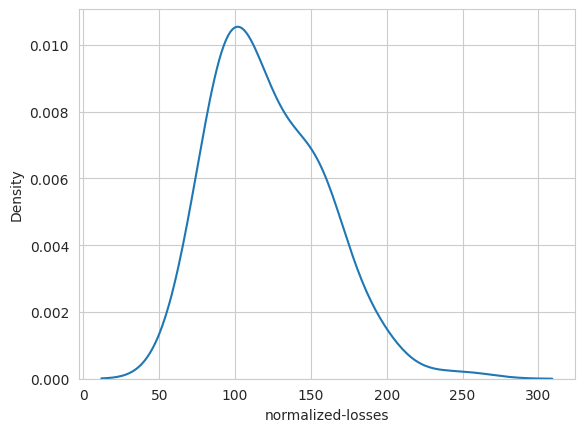

In [60]:
sns.set_style('whitegrid')
sns.kdeplot(data['normalized-losses'], bw=0.5)

In [73]:
num_features = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

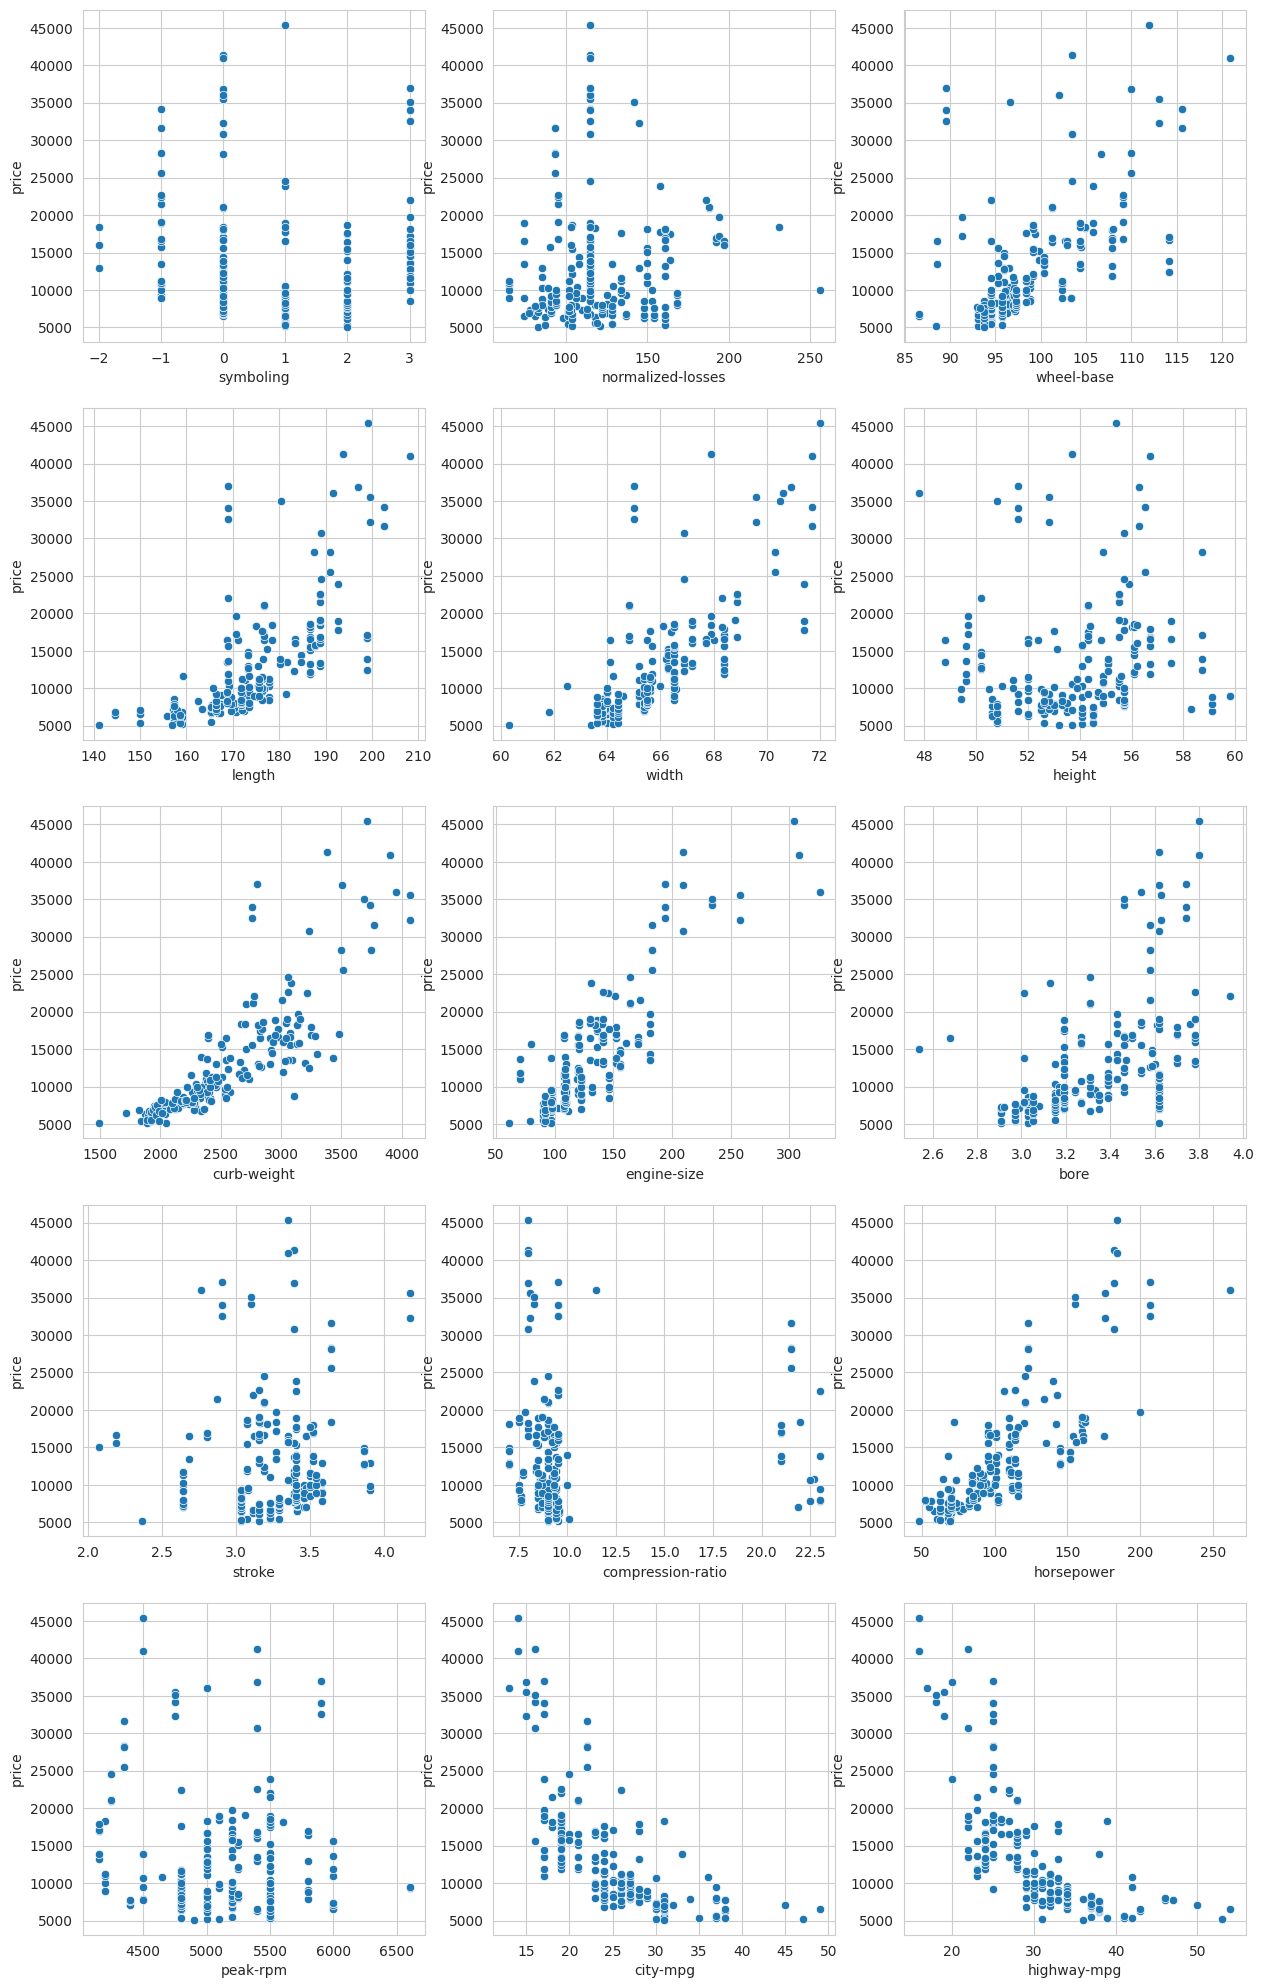

In [75]:
plt.figure(figsize = (15,25))
for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'price',data = data)

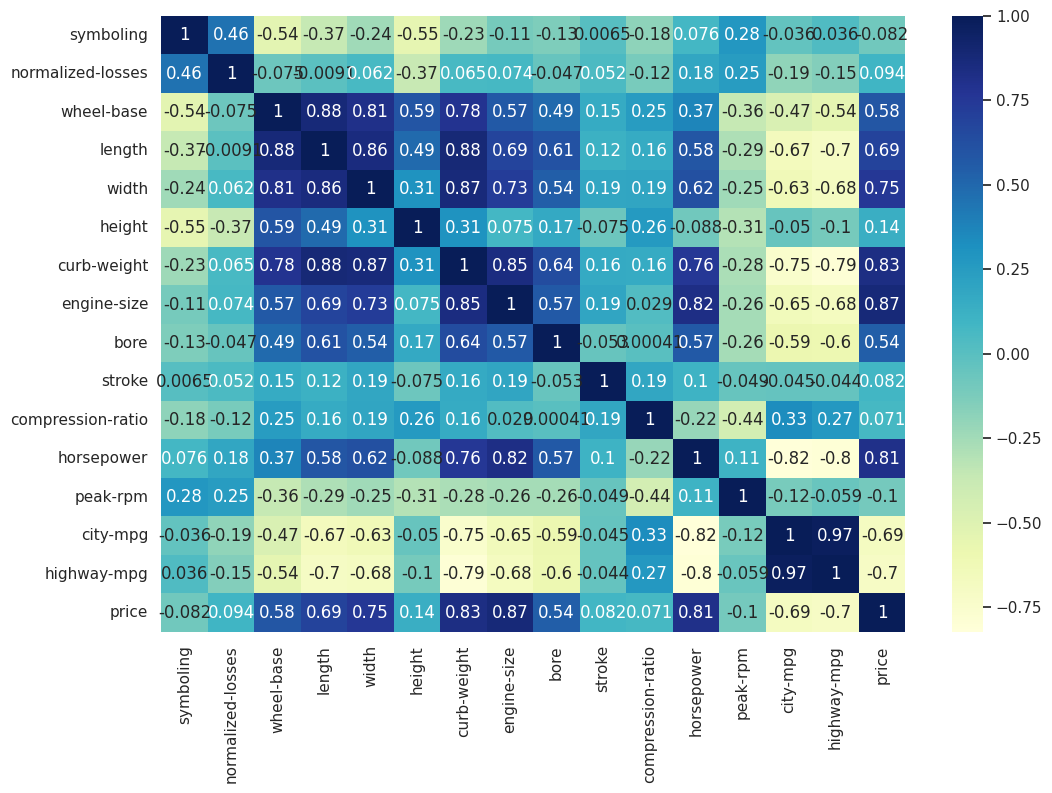

In [77]:
sns.set(rc = {'figure.figsize':(12,8)})
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [79]:
cat_features = ['fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type','num-of-cylinders', 'fuel-system']

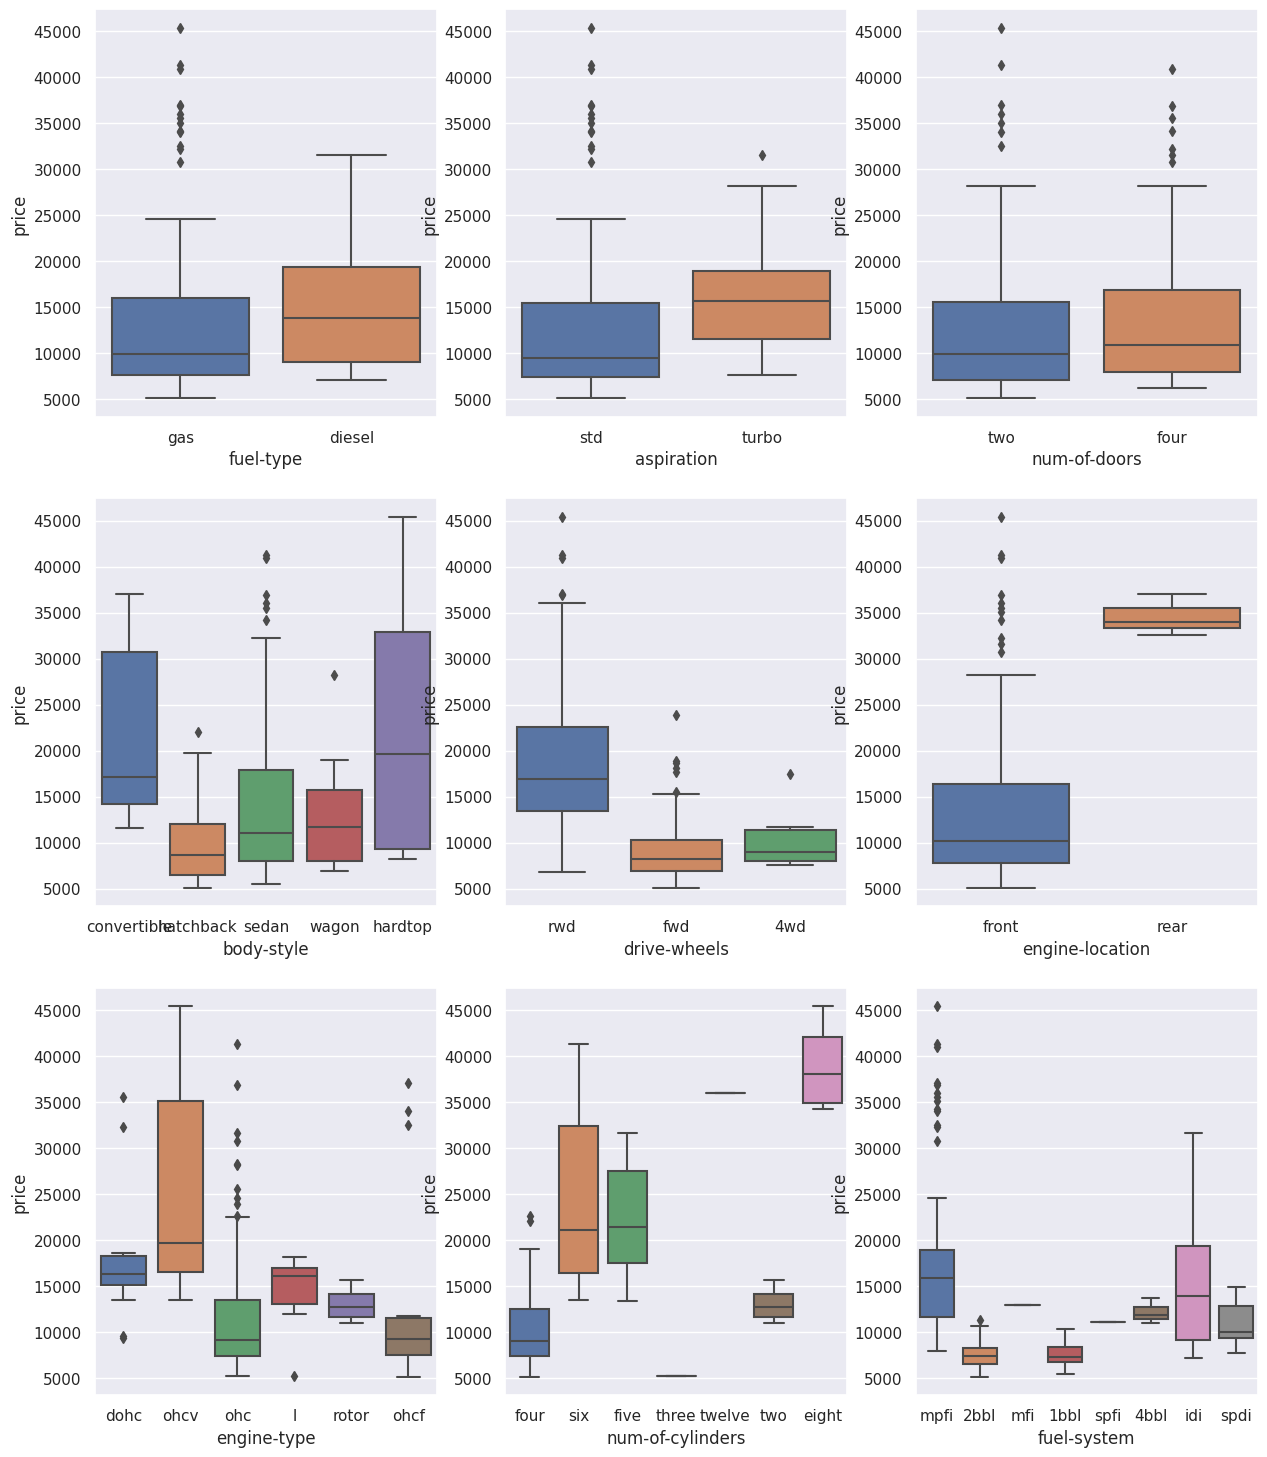

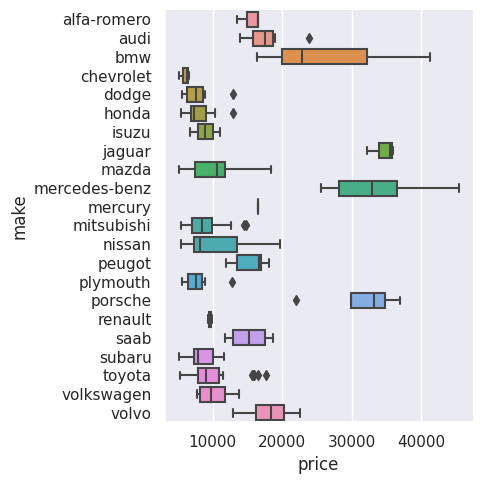

In [80]:
plt.figure(figsize = (15,18))
for i in enumerate (cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'price',data = data)
sns.catplot(y="make", x="price", kind="box", data=data)

**Make data model ready**

In [81]:
cat_features = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [82]:
encoded_data = pd.get_dummies(data, columns = cat_features)

In [83]:
encoded_data.shape

(201, 75)

**split data into independant and target data**

In [84]:
X = encoded_data.drop('price', axis = 1)
y = encoded_data['price']

In [85]:
print(X.shape,y.shape)

(201, 74) (201,)


**split data into train and test set**

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 15)

In [87]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(134, 74) (67, 74) (134,) (67,)


**Data Standardization**

In [88]:
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

**Model deployment**

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [91]:
reg = Ridge()
reg.fit(std_X_train, y_train)
print('train accuracy : ',reg.score(std_X_train, y_train))
print('test accuracy : ',reg.score(std_X_test, y_test))

train accuracy :  0.9766759424512691
test accuracy :  0.8764347265399185


In [92]:
y_pred = reg.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  5095197.83663198


In [93]:
features = X.columns
# get importance
importance = abs(reg.coef_)
# summarize feature importance
imp_features = {}
for i in range(len(features)):
    imp_features[features[i]] = importance[i]
top_10 = (sorted(imp_features.items(), key=lambda x: x[1], reverse=True)[:10])
top_10

[('curb-weight', 3725.3135042677136),
 ('engine-size', 2077.747060319391),
 ('make_bmw', 1655.8225395950133),
 ('wheel-base', 1357.8045558470317),
 ('height', 1295.7011892972585),
 ('horsepower', 1280.0989585099921),
 ('length', 1173.9389802470178),
 ('engine-type_ohcv', 1051.3668481029708),
 ('num-of-cylinders_eight', 950.2531185887038),
 ('make_mitsubishi', 917.2812012792554)]

In [94]:
from prettytable import PrettyTable
from prettytable import ALL as ALL
table=PrettyTable(hrules=ALL)
table.field_names = ["Sr.No.", "Model", "Train accuracy", "Test accuracy", "MSE"] 
table.add_row([1, "Linear Regression", 0.964 , 0.871, 3570110.94 ])
table.add_row([2, "Ridge Regression", 0.964 , 0.870, 3588613.77 ])
table.add_row([3, "Lasso Regression", 0.964 , 0.854, 4046019.36 ])
table.add_row([4, "Polynomial SVR", -0.128 , 0.00029, 27800504.99 ])

print(table)

+--------+-------------------+----------------+---------------+-------------+
| Sr.No. |       Model       | Train accuracy | Test accuracy |     MSE     |
+--------+-------------------+----------------+---------------+-------------+
|   1    | Linear Regression |     0.964      |     0.871     |  3570110.94 |
+--------+-------------------+----------------+---------------+-------------+
|   2    |  Ridge Regression |     0.964      |      0.87     |  3588613.77 |
+--------+-------------------+----------------+---------------+-------------+
|   3    |  Lasso Regression |     0.964      |     0.854     |  4046019.36 |
+--------+-------------------+----------------+---------------+-------------+
|   4    |   Polynomial SVR  |     -0.128     |    0.00029    | 27800504.99 |
+--------+-------------------+----------------+---------------+-------------+


**Build pipeline for price prediction**

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [96]:
Input=[('scale',StandardScaler()), ('model',Ridge())]

In [97]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge())])

In [98]:
pipe.fit(X, y)
print('train accuracy : ',pipe.score(X, y))

train accuracy :  0.9667592687825075


**Price prediction function**

In [99]:
def predict_price(wheel_base, width,engine_size, bore,horsepower,highway_mpg,make,fuel,aspiration,
                  body_style,drive_wheels,engine_location,num_of_cylinders,fuel_system):    
    loc_index = np.where(X.columns==make)[0][0]
    loc_index = np.where(X.columns==fuel)[0][0]
    loc_index = np.where(X.columns==aspiration)[0][0]
    loc_index = np.where(X.columns==body_style)[0][0]
    loc_index = np.where(X.columns==drive_wheels)[0][0]
    loc_index = np.where(X.columns==engine_location)[0][0]
    loc_index = np.where(X.columns==num_of_cylinders)[0][0]
    loc_index = np.where(X.columns==fuel_system)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = wheel_base
    x[1] = width
    x[2] = engine_size
    x[3] = bore
    x[4] = horsepower
    x[5] = highway_mpg
    if loc_index >= 0:
      x[loc_index] = 1

    return pipe.predict([x])[0]

In [100]:
predict_price(90, 80,150, 3.50,120,25,'make_saab','fuel-type_gas','aspiration_std','body-style_sedan','drive-wheels_fwd','engine-location_front',
       'num-of-cylinders_four','fuel-system_4bbl')

29313.675875898152